# 1.Problem statement

In [90]:
# To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [92]:
df_train = pd.read_csv("C:/Users/Amit_W/E1/ETL_PROJECT/training_set.csv")


In [93]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
# dropping columns having no importance

In [95]:
drop_list=['Id']

In [96]:
df_train = df_train.drop("Id", axis = 1)

In [97]:
# Missing values Treatment

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [99]:
df_train.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [100]:
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(),inplace=True)
df_train["Fireplaces"].fillna(df_train["Fireplaces"].mean(),inplace=True)
df_train["GarageCars"].fillna(df_train["GarageCars"].mean(),inplace=True)
df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean(),inplace=True)

df_train["Alley"].fillna("No alley access",inplace=True)
df_train["MasVnrType"].fillna("No MasVnrType",inplace=True)
df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mean(),inplace=True)
df_train['BsmtQual'].fillna("No Basement",inplace=True)
df_train['BsmtCond'].fillna('No BsmtCond',inplace=True)
df_train['BsmtExposure'].fillna("No BsmtExposure",inplace=True)
df_train['BsmtFinType1'].fillna("No BsmtFinType1",inplace=True)
df_train['BsmtFinType2'].fillna('No BsmtFinType2',inplace=True)
df_train['CentralAir'].fillna('No CentralAir',inplace=True)
df_train['FireplaceQu'].fillna("No FireplaceQu",inplace=True)
df_train['GarageType'].fillna("No GarageType",inplace=True)
df_train['GarageFinish'].fillna("No Garage",inplace=True)
df_train['GarageQual'].fillna("No Garage",inplace=True)
df_train['GarageCond'].fillna("No Garage",inplace=True)
df_train['PoolQC'].fillna("No Pool",inplace=True)
df_train['Fence'].fillna("No Fence",inplace=True)
df_train['MiscFeature'].fillna("None",inplace=True)
df_train['Fireplaces'].fillna(df_train['Fireplaces'].median(),inplace=True)
df_train["Electrical"].fillna(df_train["Electrical"].mode()[0],inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)



In [101]:
df_train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [102]:
# remove outliers

In [103]:
cat = []
con = []
for i in df_train.columns:
    if (df_train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [104]:
df_train_con = con
df_train_con=df_train[con]
df_train_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [105]:
y=df_train_con["SalePrice"]
df_train_con=df_train_con.drop('SalePrice',axis=1)
df_train_con

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


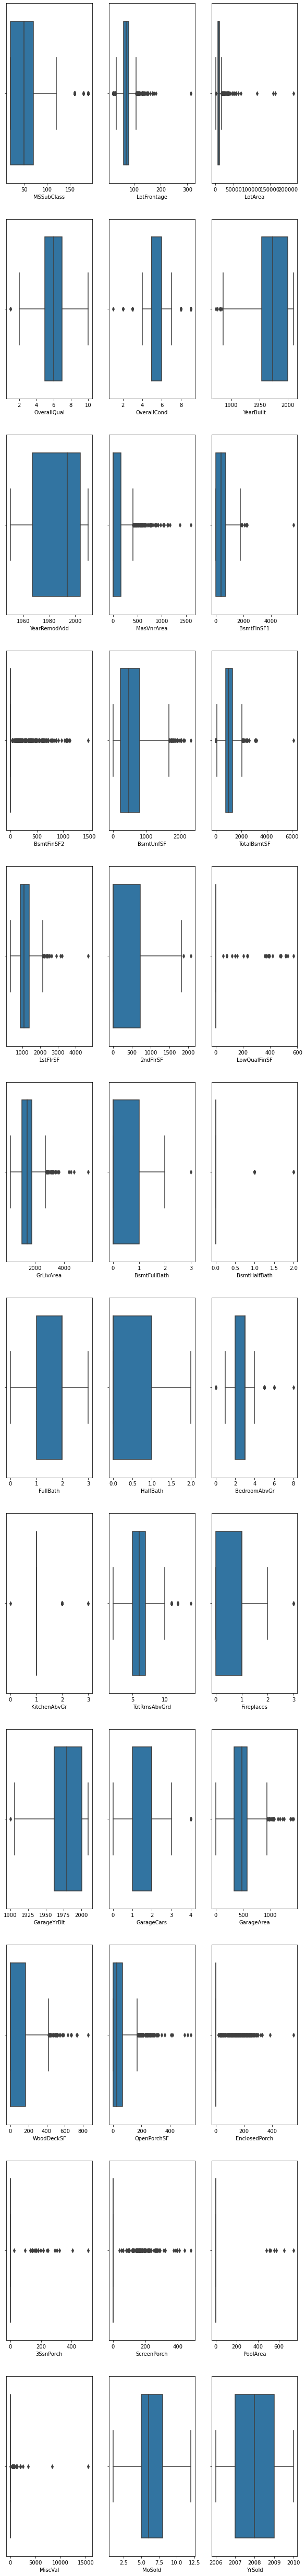

In [106]:
plt.figure(figsize=(10,90))
for x1,i in enumerate(df_train_con.columns):
    if df_train_con[i].dtypes=='int64' or df_train_con[i].dtypes=='float64':
        plt.subplot(12,3,x1+1)
        sns.boxplot(df_train_con[i])

In [107]:
for i in df_train_con.columns:
    q1 = df_train_con[i].quantile(0.25)
    q3 = df_train_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_train_con.loc[(df_train_con[i]>uppertail)|(df_train_con[i]<lowertail)]
    mean_1= df_train_con[i].mean()
    df_train_con.loc[(df_train_con[i]>uppertail)| (df_train_con[i]<lowertail),i]=mean_1

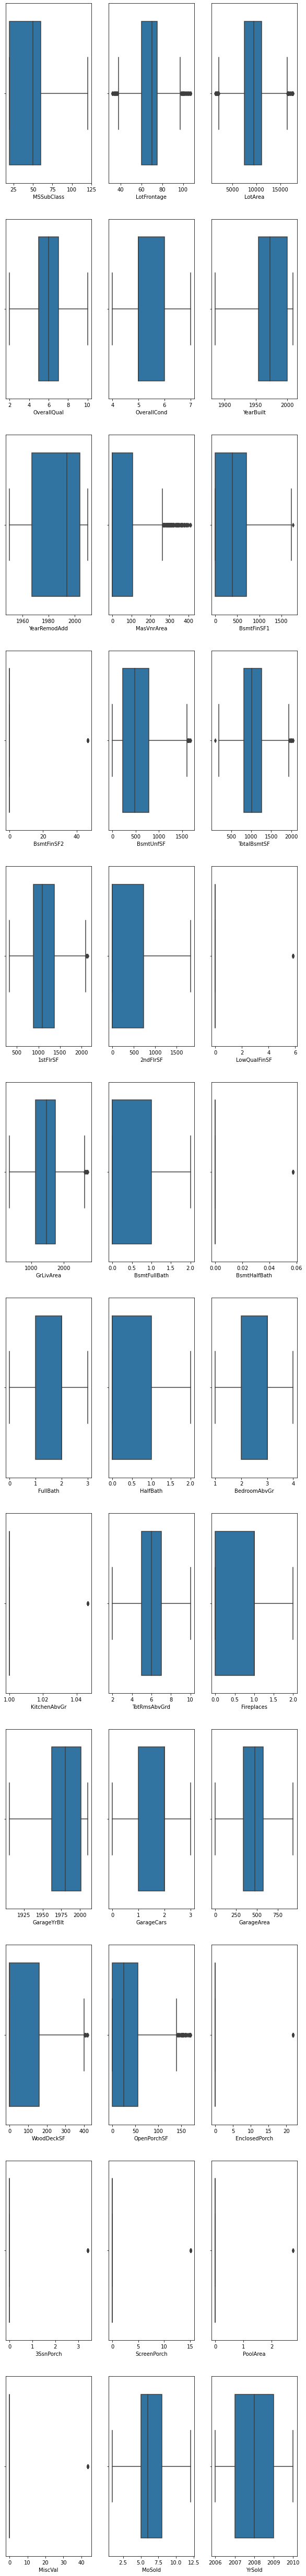

In [108]:
plt.figure(figsize=(10,90))
for x1,i in enumerate(df_train_con.columns):
    if df_train_con[i].dtypes=='int64' or df_train_con[i].dtypes=='float64':
        plt.subplot(12,3,x1+1)
        sns.boxplot(df_train_con[i])

In [109]:

df_train_cat = df_train[cat]
df_train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1456,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,MnPrv,None,WD,Normal
1457,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,No Pool,GdPrv,Shed,WD,Normal
1458,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [110]:
# EDA

In [111]:
df_dum = pd.get_dummies(df_train_cat)

In [112]:
df_dum.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [113]:
# STANDARDIZATION

In [114]:
std_scaler = StandardScaler()
std_scaler1 = std_scaler.fit_transform(df_train_con)

In [115]:
x = pd.DataFrame(std_scaler1,columns=df_train_con.columns)

In [116]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.394203,-0.292817,-0.281551,0.652544,-0.605325,1.060721,0.878668,1.230379,0.644068,-0.359384,...,0.421830,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777
1,-1.022538,0.789999,0.085824,-0.077616,0.145834,0.145344,-0.429577,-0.674047,1.287159,-0.359384,...,-0.019974,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439
2,0.394203,-0.076254,0.612928,0.652544,-0.605325,0.992916,0.830215,0.900020,0.123920,-0.359384,...,0.723060,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777
3,0.748388,-0.653756,0.069852,0.652544,-0.605325,-1.922731,-0.720298,-0.674047,-0.514443,-0.359384,...,0.893757,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655
4,0.394203,1.078750,1.574494,1.382705,-0.605325,0.959013,0.733308,2.726714,0.523488,-0.359384,...,1.867734,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.394203,-0.509380,-0.451822,-0.077616,-0.605325,0.925110,0.733308,-0.674047,-1.025134,-0.359384,...,-0.019974,-0.800451,0.090533,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.620891,-0.614439
1456,-1.022538,1.150938,1.227883,-0.077616,0.700261,0.213150,0.151865,0.482212,0.842669,2.782538,...,0.180846,2.499033,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,1.645210
1457,0.748388,-0.220629,-0.092432,0.652544,0.145834,-1.041256,1.024029,-0.674047,-0.374949,-0.359384,...,-1.064238,-0.800451,0.554631,-0.407596,-0.129279,-0.293785,-0.069409,5.203549,-0.489110,1.645210
1458,-1.022538,-0.076254,0.123201,-0.807777,0.700261,-0.736130,0.539493,-0.674047,-0.909283,2.782538,...,-1.124484,2.659753,-0.837663,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-0.859110,1.645210


In [117]:
df_train_merge = pd.concat([df_dum,x,y],axis=1)
df_train_merge

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777,208500
1,0,0,0,1,0,0,1,0,1,0,...,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439,181500
2,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777,223500
3,0,0,0,1,0,0,1,0,1,0,...,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655,140000
4,0,0,0,1,0,0,1,0,1,0,...,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.090533,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.620891,-0.614439,175000
1456,0,0,0,1,0,0,1,0,1,0,...,2.499033,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,1.645210,210000
1457,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.554631,-0.407596,-0.129279,-0.293785,-0.069409,5.203549,-0.489110,1.645210,266500
1458,0,0,0,1,0,0,1,0,1,0,...,2.659753,-0.837663,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-0.859110,1.645210,142125


In [118]:
df_train_merge

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.577836,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,0.138777,208500
1,0,0,0,1,0,0,1,0,1,0,...,2.016873,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-0.489110,-0.614439,181500
2,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.136943,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.990891,0.138777,223500
3,0,0,0,1,0,0,1,0,1,0,...,-0.800451,-0.025491,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,-1.367655,140000
4,0,0,0,1,0,0,1,0,1,0,...,1.014738,1.111549,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,2.100892,0.138777,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.090533,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,0.620891,-0.614439,175000
1456,0,0,0,1,0,0,1,0,1,0,...,2.499033,-0.837663,-0.407596,-0.129279,-0.293785,-0.069409,-0.192177,-1.599111,1.645210,210000
1457,0,0,0,1,0,0,1,0,1,0,...,-0.800451,0.554631,-0.407596,-0.129279,-0.293785,-0.069409,5.203549,-0.489110,1.645210,266500
1458,0,0,0,1,0,0,1,0,1,0,...,2.659753,-0.837663,2.453412,-0.129279,-0.293785,-0.069409,-0.192177,-0.859110,1.645210,142125


In [119]:
df_train_merge.corr()['SalePrice']

MSZoning_C (all)   -0.111257
MSZoning_FV         0.089950
MSZoning_RH        -0.065429
MSZoning_RL         0.245063
MSZoning_RM        -0.288065
                      ...   
PoolArea            0.093708
MiscVal            -0.068374
MoSold              0.046432
YrSold             -0.028923
SalePrice           1.000000
Name: SalePrice, Length: 304, dtype: float64

In [120]:
# checking multicolinearity

In [121]:
noncorrelation = [column for column in df_train_merge if abs(df_train_merge[column].corr(df_train_merge["SalePrice"]))<0.05]
corr_matrix = df_train_merge.drop(noncorrelation,axis=1)
corr_matrix.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_No alley access,LotShape_IR1,LotShape_IR2,LotShape_Reg,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,0,0,0,1,0,0,1,0,0,1,...,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,-0.069409,-0.192177,208500
1,0,0,0,1,0,0,1,0,0,1,...,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,-0.069409,-0.192177,181500
2,0,0,0,1,0,0,1,1,0,0,...,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,-0.069409,-0.192177,223500
3,0,0,0,1,0,0,1,1,0,0,...,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,-0.069409,-0.192177,140000
4,0,0,0,1,0,0,1,1,0,0,...,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,-0.069409,-0.192177,250000


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [123]:
vif = pd.DataFrame()
vif['Features'] =corr_matrix.columns
vif['VIF'] = [variance_inflation_factor(corr_matrix.values,i) for i in range(corr_matrix.shape[1])]
vif

,Features,VIF
0,MSZoning_C (all),inf
1,MSZoning_FV,inf
2,MSZoning_RH,inf
3,MSZoning_RL,inf
4,MSZoning_RM,inf
...,...,...
190,EnclosedPorch,1.594955
191,ScreenPorch,1.213717
192,PoolArea,inf
193,MiscVal,31.527576


In [124]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)

['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No BsmtCond', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_No BsmtExposure', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_No BsmtFinType1', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_No BsmtFinType2', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'CentralAir_N', 'CentralAi

In [125]:
final_df=corr_matrix.drop(droplist,axis=1)
final_df.head()

,Alley_Grvl,Alley_No alley access,LotShape_IR2,LandContour_Bnk,LandContour_HLS,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Gtl,Neighborhood_BrDale,Neighborhood_BrkSide,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,0,1,0,0,0,0,1,1,0,0,...,1.088511,-0.961480,1.019109,0.327019,0.421830,-0.800451,0.577836,-0.407596,-0.293785,208500
1,0,1,0,0,0,0,0,1,0,0,...,-0.285975,0.628166,-0.110578,0.327019,-0.019974,2.016873,-0.837663,-0.407596,-0.293785,181500
2,0,1,0,0,0,0,1,1,0,0,...,-0.285975,0.628166,0.935429,0.327019,0.723060,-0.800451,0.136943,-0.407596,-0.293785,223500
3,0,1,0,0,0,0,0,1,0,0,...,0.401268,0.628166,0.809908,1.686633,0.893757,-0.800451,-0.025491,2.453412,-0.293785,140000
4,0,1,0,0,0,0,0,1,0,0,...,1.775754,0.628166,0.893589,1.686633,1.867734,1.014738,1.111549,-0.407596,-0.293785,250000


In [126]:
final_df.shape

(1460, 109)

In [127]:
# model_Building

In [128]:
xtrain,xtest,ytrain,ytest = train_test_split(df_train_B,y,test_size=0.25,random_state=31)

NameError: name 'df_train_B' is not defined

In [ ]:
df_train_B

In [ ]:
xtrain

In [ ]:
xtest

In [ ]:
# Model_Training

In [ ]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

In [ ]:
# Backward Feature Elimination

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
sfs = SequentialFeatureSelector(lin_model,direction='backward')
sfs.fit(x,y)

array = sfs.get_support()

s1 = pd.Series(array,index = x.columns)
s1

In [ ]:
drop_list=['YearBuilt','MasVnrArea','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageArea','LowQualFinSF','GrLivArea','FullBath','HalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

In [ ]:
true_value=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','1stFlrSF','2ndFlrSF','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','WoodDeckSF','OpenPorchSF']


In [ ]:
df_train_B = x[true_value]

# df_train_merge = pd.concat([df_dum,x,y],axis=1)
# df_train_merge

In [ ]:
df_train_B  

In [ ]:
# MODEL EVALUATION

In [ ]:
# linear REgression model

In [ ]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

In [ ]:
# Testing Data Evaluation
ypredtest = lin_model.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

In [ ]:
# training data evaluation
ypredtrain = lin_model.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

In [ ]:
# LASSO

In [ ]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)

In [ ]:
# Testing Data Evaluation
ypredtest = lasso.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

In [ ]:
# training data evaluation
ypredtrain = lasso.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

In [ ]:
# RIDGE

In [ ]:
ridge = Ridge()
ridge.fit(xtrain,ytrain)

In [ ]:
# Testing Data Evaluation
ypredtest = ridge.predict(xtest)

Mean_squared_error = mean_squared_error(ytest,ypredtest)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytest,ypredtest)
print('R2-Score:',r2Score)

In [ ]:
#Training Data Evaluation
ypredtrain = ridge.predict(xtrain)

Mean_squared_error = mean_squared_error(ytrain,ypredtrain)
print('Mean Squared Error:',Mean_squared_error)

r2Score = r2_score(ytrain,ypredtrain)
print('R2-Score:',r2Score)

# Test_data

In [ ]:
df_test = pd.read_csv("C:/Users/Amit_W/E1/project/testing_set.csv")

In [ ]:
df_test.head()

In [ ]:
# dropping columns having no importance

In [ ]:
ID = df_test[['Id']]

In [ ]:
drop_list=['Id']

In [ ]:
df_test = df_test.drop("Id",axis = 1)

In [ ]:
df_test.isna().sum()

In [ ]:
df_test["LotFrontage"].fillna(df_test["LotFrontage"].mean(),inplace=True)
df_test["Alley"].fillna("No alley access",inplace=True)
df_test["MasVnrType"].fillna("No MasVnrType",inplace=True)
df_test["MasVnrArea"].fillna(df_test["MasVnrArea"].mean(),inplace=True)
df_test['BsmtQual'].fillna("No Basement",inplace=True)
df_test['BsmtCond'].fillna('No BsmtCond',inplace=True)
df_test['BsmtExposure'].fillna("No BsmtExposure",inplace=True)
df_test['BsmtFinType1'].fillna("No BsmtFinType1",inplace=True)
df_test['BsmtFinType2'].fillna('No BsmtFinType2',inplace=True)
df_test['CentralAir'].fillna('No CentralAir',inplace=True)
df_test['FireplaceQu'].fillna("No FireplaceQu",inplace=True)
df_test['GarageType'].fillna("No GarageType",inplace=True)
df_test['GarageFinish'].fillna("No Garage",inplace=True)
df_test['GarageQual'].fillna("No Garage",inplace=True)
df_test['PoolQC'].fillna("No Pool",inplace=True)
df_test['Fence'].fillna("No Fence",inplace=True)
df_test['MiscFeature'].fillna("None",inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(),inplace=True)
df_test["Electrical"].fillna(df_test["Electrical"].mode()[0],inplace=True)





In [ ]:
# remove outliers

In [ ]:
cat = []
con = []
for i in df_test.columns:
    if (df_test[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [ ]:
df_test_cat = cat
df_test_cat=df_test[cat]
df_test_cat

In [ ]:
df_test_con = con
df_test_con=df_test[con]
df_test_con

In [ ]:
plt.figure(figsize=(10,90))
for x1,i in enumerate(df_test_con.columns):
    if df_test_con[i].dtypes=='int64' or df_test_con[i].dtypes=='float64':
        plt.subplot(12,3,x1+1)
        sns.boxplot(df_test_con[i])

In [ ]:
for i in df_test_con.columns:
    q1 = df_test_con[i].quantile(0.25)
    q3 = df_test_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_test_con.loc[(df_test_con[i]>uppertail)|(df_test_con[i]<lowertail)]
    mean_1= df_test_con[i].mean()
    df_test_con.loc[(df_test_con[i]>uppertail)| (df_test_con[i]<lowertail),i]=mean_1

In [ ]:
plt.figure(figsize=(10,90))
for x1,i in enumerate(df_test_con.columns):
    if df_test_con[i].dtypes=='int64' or df_test_con[i].dtypes=='float64':
        plt.subplot(12,3,x1+1)
        sns.boxplot(df_test_con[i])

In [ ]:
# OHE

In [ ]:
df_test_dum = pd.get_dummies(df_test_cat)
df_test_dum

In [ ]:
df_test_dum.shape

In [ ]:
# STANDARDIZATION

In [ ]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_test_con)

In [ ]:
x_T = pd.DataFrame(std_scaled,columns=df_test_con.columns)
x_T

In [ ]:
X_T = pd.concat([df_test_dum,x_T],axis=1)
X_T

In [ ]:
df_train_B.shape

In [ ]:
df_test_B = X_T[true_value]

# Final_Prediction

In [ ]:
Prediction = ridge.predict(df_test_B)
Prediction

In [ ]:
df3 = pd.read_csv("C:/Users/Amit_W/E1/project/testing_set.csv")

In [ ]:
df3

In [ ]:
ID = df3[['Id']]

In [ ]:
Final_out =pd.DataFrame()
Final_out[['Id']]=ID
Final_out[['SalePrice']] = Prediction

In [ ]:
Final_out